# 1. Import Needed Libraries and packages

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for make beautiful reports
from colorama import Fore

from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# !pip install xgboost
import xgboost as xgb
# !pip install catboost
import catboost as ctb

# for Handling imbalanced data set
# !pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

import shap
shap.initjs()

# For Saving Model
import joblib

import warnings
warnings.filterwarnings('ignore')

# 2. Read and load Data

In [2]:
df = pd.read_csv(r'IT_customer_churn.csv')

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 3. EDA

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
def data_set_info(data):
      print(f'Data Frame Size: {data.size}\n\n')
      print(f'Data Frame Shape: {data.shape}\n\n')
      print(f'Data Frame Columns: {data.columns}\n\n')
      print(f'Data Frame Data Types:\n{data.dtypes}\n\n')
      print(f'Data Frame Head: \n{data.head(5)}\n\n')
      print(f'Data Frame tail: \n{data.tail(5)}\n\n')
      print(f'Data Frame Information:\n{data.info()}\n\n')
      print(f'Data Frame Null Values: \n{data.isnull().sum()}\n\n')
      print(f'Data Frame describtions: \n{data.describe()}\n\n')
        
data_set_info(df)

Data Frame Size: 140860


Data Frame Shape: (7043, 20)


Data Frame Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Data Frame Data Types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object

## Some Visualizations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


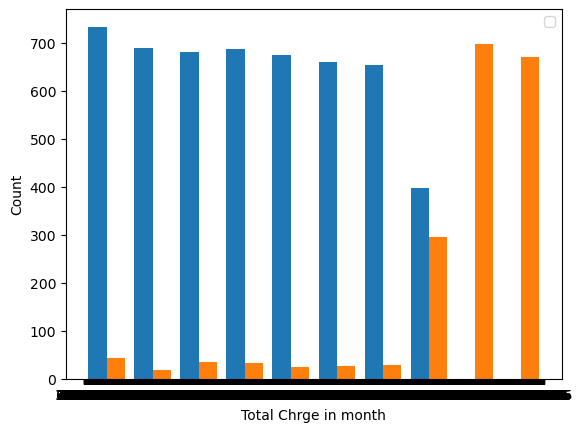

In [9]:
churn_y = df[ df.Churn == 'Yes' ]
churn_n = df[ df.Churn == 'No' ]

tc_chy = churn_y.TotalCharges
tc_chn = churn_n.TotalCharges

plt.hist([tc_chn, tc_chy],)
plt.xlabel('Total Chrge in month')
plt.ylabel('Count')
plt.legend()
plt.show()

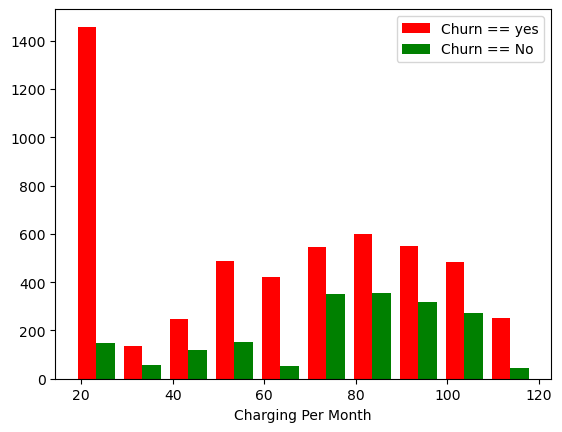

In [10]:
mt_ch_n = df[ df.Churn == 'No' ].MonthlyCharges
mt_ch_y = df[ df.Churn == 'Yes' ].MonthlyCharges

plt.hist(x=[mt_ch_n, mt_ch_y], color=['red', 'green'], label=['Churn == yes', 'Churn == No'])
plt.legend()
plt.xlabel('Charging Per Month')
plt.show()

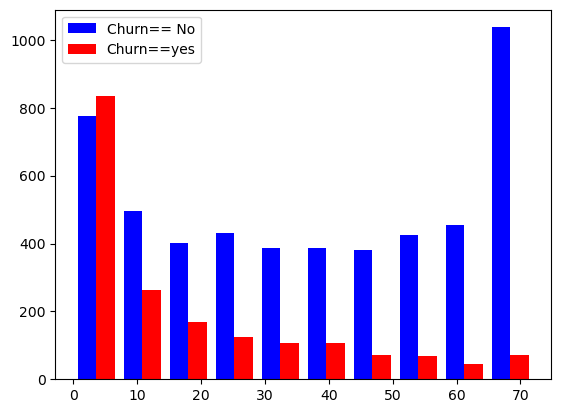

In [11]:
tn_ch_n = df[ df.Churn == 'No' ].tenure
tn_ch_y = df[ df.Churn == 'Yes' ].tenure

plt.hist([tn_ch_n, tn_ch_y], color=['blue', 'red'], label=['Churn== No', 'Churn==yes'])
plt.legend()
plt.show()

# Data Preprocessing

In [12]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [13]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
def Show_dtype(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}: {df[col].unique()}')
Show_dtype(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [18]:
pd.to_numeric(df.TotalCharges, errors='raise')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [16]:
df = df[ df.TotalCharges != ' ' ]

In [17]:
df.TotalCharges =pd.to_numeric(df.TotalCharges, errors='coerce')

In [19]:
df.replace({'No phone service': "No",'No internet service': 'No'}, inplace=True)

In [20]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in yes_no_cols:
    df[i].replace({'Yes': 1, 'No': 0}, inplace=True)

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [22]:
def Show_dtype(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}:\n\t {df[col].unique()}')
Show_dtype(df)

gender:
	 ['Female' 'Male']
InternetService:
	 ['DSL' 'Fiber optic' 'No']
Contract:
	 ['Month-to-month' 'One year' 'Two year']
PaymentMethod:
	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
df.gender = df['gender'].replace({'Female':0, 'Male': 1})

In [24]:
cols_one_hot = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, cols_one_hot)

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]) 

In [27]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


# Modeling

In [28]:
X = df.drop('Churn', axis=1).values
y = df.Churn.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [29]:
# Model 1: logistic
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred_1 = model.predict(X_test)

In [30]:
print('Modeling Without resampling')
print(f'Accuracy  : {accuracy_score(y_test, pred_1)}')
print(f'Precision : {precision_score(y_test, pred_1)}')
print(f'Recall    : {recall_score(y_test, pred_1)}')
print(f'f1 score  : {f1_score(y_test, pred_1)}')

Modeling Without resampling
Accuracy  : 0.8048919226393629
Precision : 0.6519607843137255
Recall    : 0.569593147751606
f1 score  : 0.608


In [31]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



In [32]:
def lg_reg(X_train, X_test, y_train, y_test, ):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.BLUE + "            Logistic Regression Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix: {sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues")}')
    plt.show()

In [33]:
# Model 2: svm
from sklearn.svm import SVC

In [34]:
def svm_c(X_train, X_test, y_train, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.LIGHTRED_EX +"            Support Vector Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Reds")}')

In [35]:
# Model 3: Random Forest
from sklearn.ensemble import RandomForestClassifier

In [36]:
def RF(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=300, max_depth=5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.GREEN +"             Random Forest Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Greens" )}')

In [37]:
# Model 4: Catboost
def cat_b(X_train, X_test, y_train, y_test):
    model = ctb.CatBoostClassifier(learning_rate=0.015, verbose=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.CYAN +"             Catboost Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="tab20b" )}')

             Catboost Classifier       


Accuracy  : 0.7974971558589306
Precision : 0.6504065040650406
Recall    : 0.5139186295503212
f1 score  : 0.5741626794258373


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.65      0.51      0.57       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


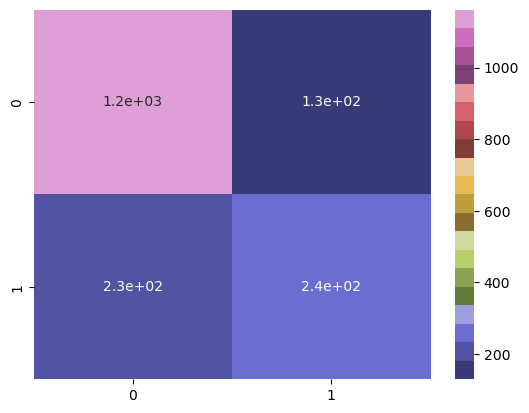

In [38]:
cat_b(X_train, X_test, y_train, y_test)

In [77]:
# Model 5: XGBoost
def xgb_c(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.CYAN +"         Extrem Gradient Boosting Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="rocket" )}')

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.871007371007371
Precision : 0.8768718801996672
Recall    : 0.8632268632268633
f1 score  : 0.8699958728848535


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1221
           1       0.88      0.86      0.87      1221

    accuracy                           0.87      2442
   macro avg       0.87      0.87      0.87      2442
weighted avg       0.87      0.87      0.87      2442

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


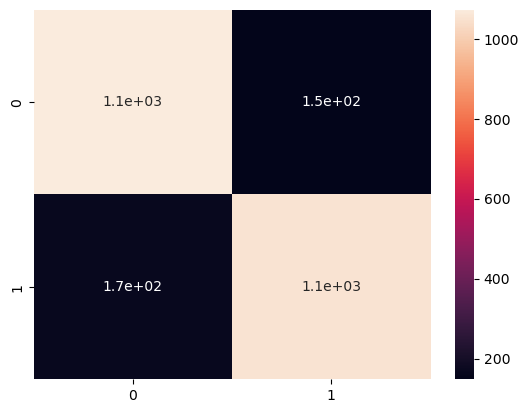

In [78]:
xgb_c(X_train, X_test, y_train, y_test)

## Imbalanced Dataset, 
### First Solution : Undersampling using Tomek links

In [47]:
# !pip install imblearn
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_ts, y_ts = tl.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ts, y_ts, random_state=42, stratify=y_ts)

            Logistic Regression Classifier       


Accuracy  : 0.8189602446483181
Precision : 0.7060240963855422
Recall    : 0.6274089935760171
f1 score  : 0.6643990929705215


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1168
           1       0.71      0.63      0.66       467

    accuracy                           0.82      1635
   macro avg       0.78      0.76      0.77      1635
weighted avg       0.81      0.82      0.82      1635

Confusion Matrix: AxesSubplot(0.125,0.11;0.62x0.77)


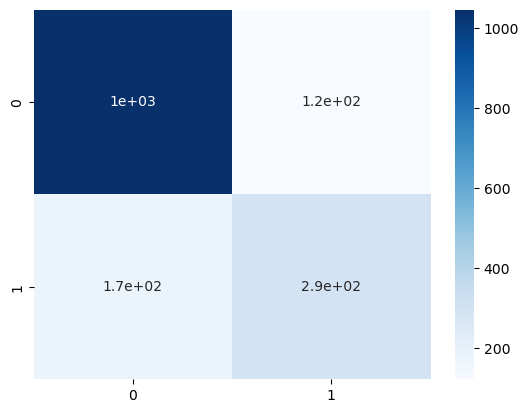

In [48]:
# Logistic Regression
lg_reg(X_train, X_test, y_train, y_test,)

            Support Vector Classifier     


Accuracy  : 0.8177370030581039
Precision : 0.7076167076167076
Recall    : 0.6167023554603854
f1 score  : 0.6590389016018308


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1168
           1       0.71      0.62      0.66       467

    accuracy                           0.82      1635
   macro avg       0.78      0.76      0.77      1635
weighted avg       0.81      0.82      0.81      1635

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


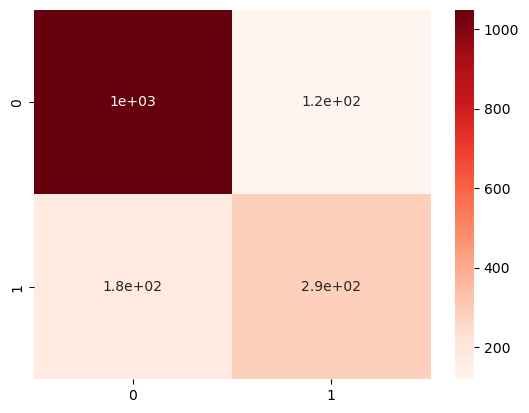

In [49]:
# SVM :
svm_c(X_train, X_test, y_train, y_test)

             Random Forest Classifier       


Accuracy  : 0.8262996941896025
Precision : 0.744
Recall    : 0.5974304068522484
f1 score  : 0.66270783847981


              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1168
           1       0.74      0.60      0.66       467

    accuracy                           0.83      1635
   macro avg       0.80      0.76      0.77      1635
weighted avg       0.82      0.83      0.82      1635

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


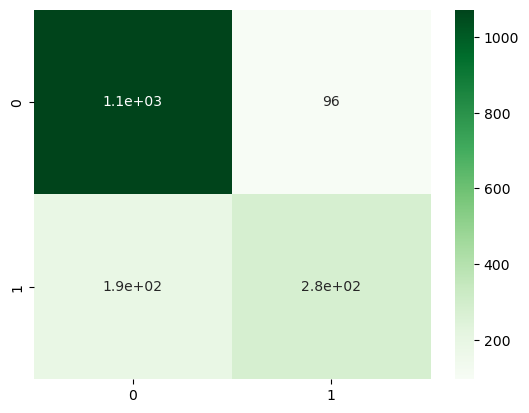

In [50]:
# Random Forest:
RF(X_train, X_test, y_train, y_test)

             Catboost Classifier       


Accuracy  : 0.8238532110091743
Precision : 0.7289002557544757
Recall    : 0.6102783725910065
f1 score  : 0.6643356643356643


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1168
           1       0.73      0.61      0.66       467

    accuracy                           0.82      1635
   macro avg       0.79      0.76      0.77      1635
weighted avg       0.82      0.82      0.82      1635

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


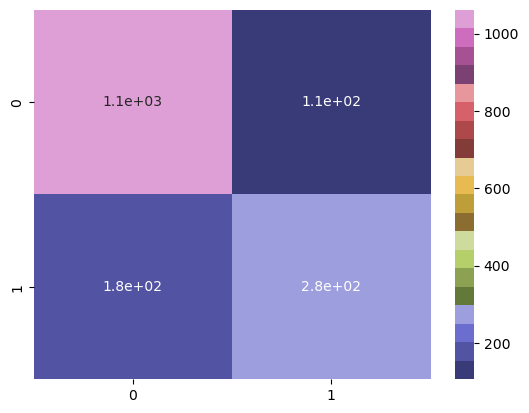

In [51]:
# catboost: 
cat_b(X_train, X_test, y_train, y_test)

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.8048929663608563
Precision : 0.6859296482412061
Recall    : 0.5845824411134903
f1 score  : 0.63121387283237


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1168
           1       0.69      0.58      0.63       467

    accuracy                           0.80      1635
   macro avg       0.76      0.74      0.75      1635
weighted avg       0.80      0.80      0.80      1635

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


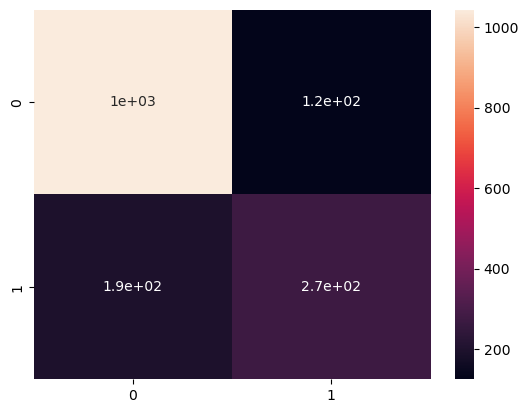

In [52]:
xgb_c(X_train, X_test, y_train, y_test)

In [54]:
model_1 = SVC(kernel='linear')
model_1.fit(X_train, y_train)

model_2 = RandomForestClassifier(n_estimators=300, max_depth=5)
model_2.fit(X_train, y_train)

model_3 = LogisticRegression()
model_3.fit(X_train, y_train)

model_4 = ctb.CatBoostClassifier(learning_rate=0.015, verbose=0)
model_4.fit(X_train, y_train)

model_5 = xgb.XGBClassifier()
model_5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

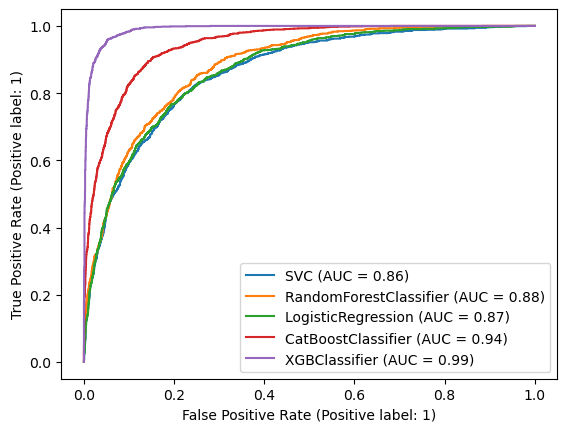

In [55]:
plt_1 = plot_roc_curve(model_1, X_train, y_train)
plot_roc_curve(model_2, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_3, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_4, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_5, X_train, y_train, ax=plt_1.ax_)
plt.show()

## Second Solution: Over Sampling Using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',
    random_state=26,
    k_neighbors=10,)
X_sm, y_sm = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, stratify=y_sm)

            Logistic Regression Classifier       


Accuracy  : 0.7738187451587917
Precision : 0.7494707127734651
Recall    : 0.8226181254841208
f1 score  : 0.7843426883308715


              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1291
           1       0.75      0.82      0.78      1291

    accuracy                           0.77      2582
   macro avg       0.78      0.77      0.77      2582
weighted avg       0.78      0.77      0.77      2582

Confusion Matrix: AxesSubplot(0.125,0.11;0.62x0.77)


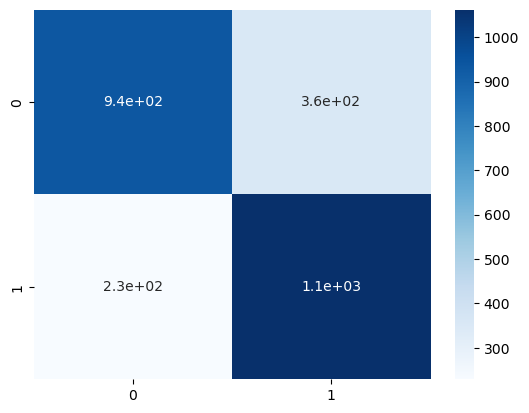

In [57]:
# Logistic Regression
lg_reg(X_train, X_test, y_train, y_test)

            Support Vector Classifier     


Accuracy  : 0.8168086754453912
Precision : 0.7976710334788938
Recall    : 0.8489542989930287
f1 score  : 0.8225140712945591


              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1291
           1       0.80      0.85      0.82      1291

    accuracy                           0.82      2582
   macro avg       0.82      0.82      0.82      2582
weighted avg       0.82      0.82      0.82      2582

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


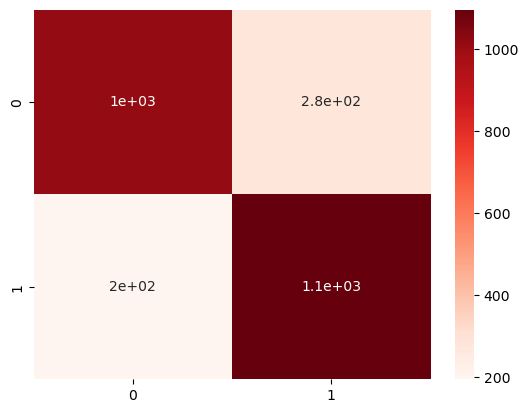

In [58]:
# SVM :
svm_c(X_train, X_test, y_train, y_test)

             Random Forest Classifier       


Accuracy  : 0.7877614252517429
Precision : 0.752549286199864
Recall    : 0.8574748257164988
f1 score  : 0.8015930485155683


              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1291
           1       0.75      0.86      0.80      1291

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


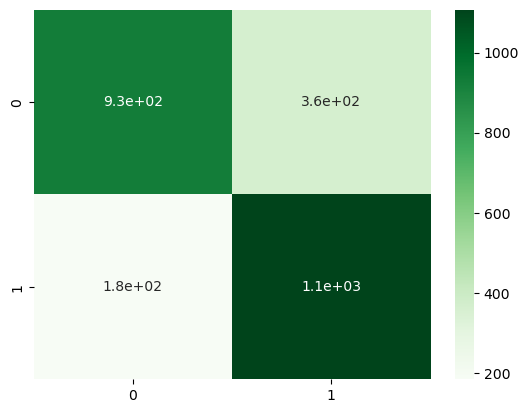

In [59]:
RF(X_train, X_test, y_train, y_test)

             Catboost Classifier       


Accuracy  : 0.8539891556932611
Precision : 0.8467374810318664
Recall    : 0.8644461657629744
f1 score  : 0.855500191644308


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1291
           1       0.85      0.86      0.86      1291

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


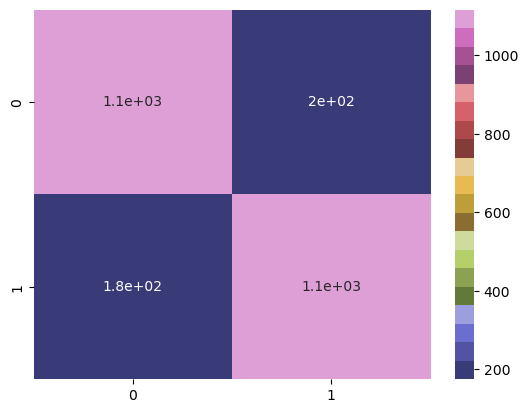

In [60]:
cat_b(X_train, X_test, y_train, y_test)

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.8458559256390396
Precision : 0.8374905517762661
Recall    : 0.8582494190549961
f1 score  : 0.8477429227237949


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1291
           1       0.84      0.86      0.85      1291

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


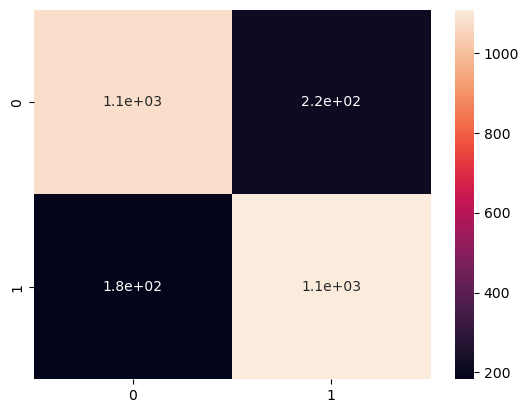

In [61]:
xgb_c(X_train, X_test, y_train, y_test)

In [62]:
model_1 = SVC(kernel='linear')
model_1.fit(X_train, y_train)

model_2 = RandomForestClassifier(n_estimators=300, max_depth=5)
model_2.fit(X_train, y_train)

model_3 = LogisticRegression()
model_3.fit(X_train, y_train)

model_4 = ctb.CatBoostClassifier(learning_rate=0.015, verbose=0)
model_4.fit(X_train, y_train)

model_5 = xgb.XGBClassifier()
model_5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

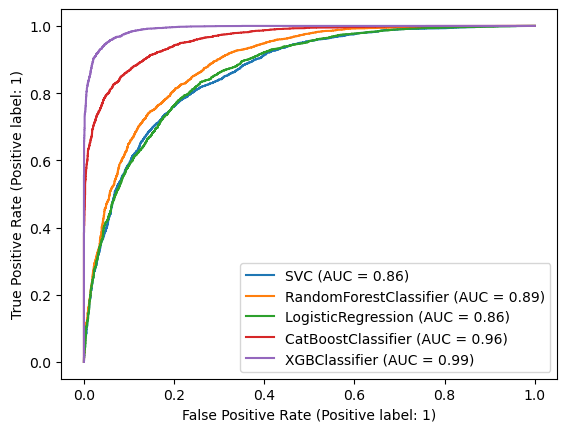

In [63]:
plt_1 = plot_roc_curve(model_1, X_train, y_train)
plot_roc_curve(model_2, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_3, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_4, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_5, X_train, y_train, ax=plt_1.ax_)
plt.show()

# Thid Solution, Use both


In [64]:
st = SMOTETomek()
X_st, y_st = st.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, random_state=42, stratify=y_st)

            Logistic Regression Classifier       


Accuracy  : 0.7874692874692875
Precision : 0.7746478873239436
Recall    : 0.8108108108108109
f1 score  : 0.7923169267707082


              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1221
           1       0.77      0.81      0.79      1221

    accuracy                           0.79      2442
   macro avg       0.79      0.79      0.79      2442
weighted avg       0.79      0.79      0.79      2442

Confusion Matrix: AxesSubplot(0.125,0.11;0.62x0.77)


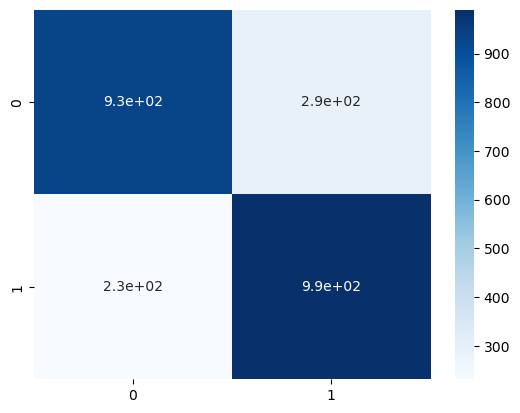

In [65]:
# Logistic Regression
lg_reg(X_train, X_test, y_train, y_test)

            Support Vector Classifier     


Accuracy  : 0.8214578214578214
Precision : 0.8122513922036595
Recall    : 0.8361998361998362
f1 score  : 0.8240516545601291


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1221
           1       0.81      0.84      0.82      1221

    accuracy                           0.82      2442
   macro avg       0.82      0.82      0.82      2442
weighted avg       0.82      0.82      0.82      2442

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


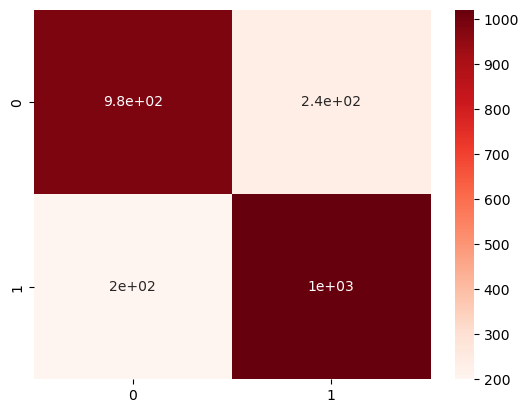

In [66]:
# SVM: 
svm_c(X_train, X_test, y_train, y_test)

             Random Forest Classifier       


Accuracy  : 0.8034398034398035
Precision : 0.7734317343173431
Recall    : 0.8583128583128583
f1 score  : 0.8136645962732918


              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1221
           1       0.77      0.86      0.81      1221

    accuracy                           0.80      2442
   macro avg       0.81      0.80      0.80      2442
weighted avg       0.81      0.80      0.80      2442

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


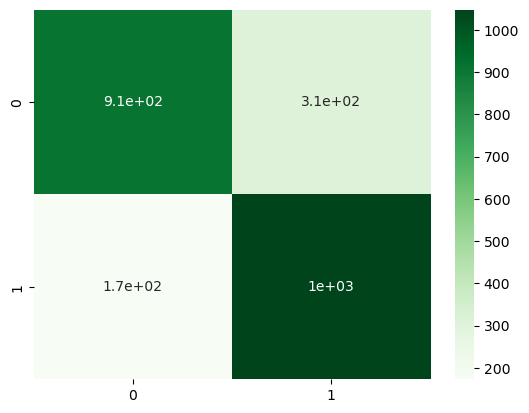

In [67]:
# Random Forest : 
RF(X_train, X_test, y_train, y_test)

             Catboost Classifier       


Accuracy  : 0.8660933660933661
Precision : 0.8669950738916257
Recall    : 0.8648648648648649
f1 score  : 0.8659286592865929


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1221
           1       0.87      0.86      0.87      1221

    accuracy                           0.87      2442
   macro avg       0.87      0.87      0.87      2442
weighted avg       0.87      0.87      0.87      2442

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


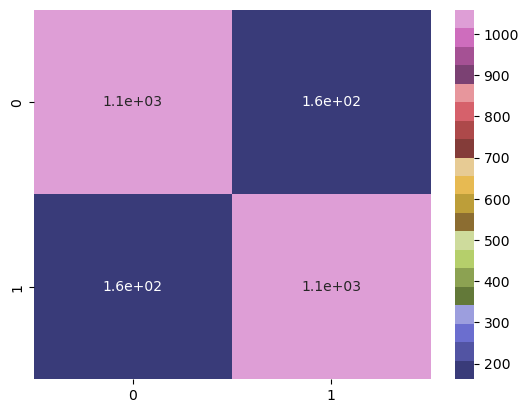

In [68]:
cat_b(X_train, X_test, y_train, y_test)

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.871007371007371
Precision : 0.8768718801996672
Recall    : 0.8632268632268633
f1 score  : 0.8699958728848535


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1221
           1       0.88      0.86      0.87      1221

    accuracy                           0.87      2442
   macro avg       0.87      0.87      0.87      2442
weighted avg       0.87      0.87      0.87      2442

Confusion Matrix:
AxesSubplot(0.125,0.11;0.62x0.77)


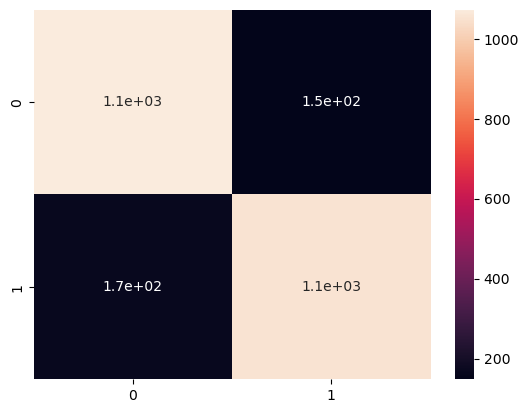

In [69]:
xgb_c(X_train, X_test, y_train, y_test)

In [70]:
model_1 = SVC(kernel='linear')
model_1.fit(X_train, y_train)

model_2 = RandomForestClassifier(n_estimators=300, max_depth=5)
model_2.fit(X_train, y_train)

model_3 = LogisticRegression()
model_3.fit(X_train, y_train)

model_4 = ctb.CatBoostClassifier(learning_rate=0.015, verbose=0)
model_4.fit(X_train, y_train)

model_5 = xgb.XGBClassifier()
model_5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

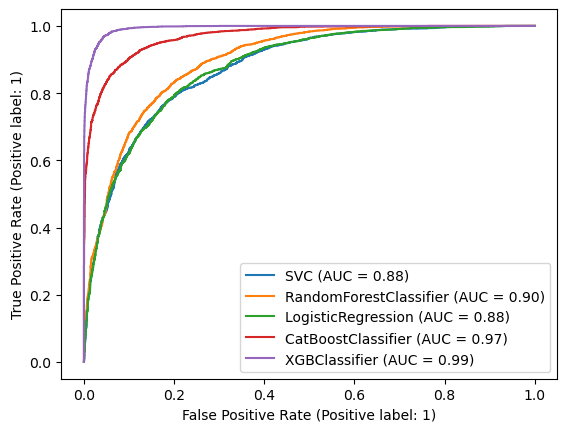

In [71]:
plt_1 = plot_roc_curve(model_1, X_train, y_train)
plot_roc_curve(model_2, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_3, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_4, X_train, y_train, ax=plt_1.ax_)
plot_roc_curve(model_5, X_train, y_train, ax=plt_1.ax_)
plt.show()

### XGBoost is worked better than others
### So lets show feature importance in this model

In [93]:
import plotly
plotly.io.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [109]:
x = model_5.feature_importances_
y = df.drop('Churn', axis=1).columns
px.histogram(x=x, y=y, marginal='violin', template='ggplot2',
             labels={'x': 'X', 'y':'Features',},
             title='XGBoost Model Feature Importance')

### Lets save our model

In [110]:
joblib.dump(model_5, 'Churn Model')

['Churn Model']